In [115]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from brainspace.utils.parcellation import map_to_labels
from wordcloud import WordCloud
import cmasher as cmr
import scipy.stats as ss
import func_utils as fu

In [116]:
g1_intra = np.genfromtxt('../../evolution/results/solar/LL-RR/G1/G1_results_herit.csv', delimiter=',')[:,2:][1:]
g2_intra = np.genfromtxt('../../evolution/results/solar/LL-RR/G2/G2_results_herit.csv', delimiter=',')[:,2:][1:]
g3_intra = np.genfromtxt('../../evolution/results/solar/LL-RR/G3/G3_results_herit.csv', delimiter=',')[:,2:][1:]
g1_inter = np.genfromtxt('../../evolution/results/solar/LR-RL/G1/G1_results_herit.csv', delimiter=',')[:,2:][1:]
g2_inter = np.genfromtxt('../../evolution/results/solar/LR-RL/G2/G2_results_herit.csv', delimiter=',')[:,2:][1:]
g3_inter = np.genfromtxt('../../evolution/results/solar/LR-RL/G3/G3_results_herit.csv', delimiter=',')[:,2:][1:]
# heritablity values
heri_hcp = [g1_intra, g2_intra, g3_intra, g1_inter, g2_inter, g3_inter]
grad_hcp = np.loadtxt('../../evolution/results/gradient/group_grad_LL.csv', delimiter=',')

In [117]:
g1_intra_se = np.genfromtxt('../../evolution/results/solar/LL-RR/G1/G1_results_se.csv', delimiter=',')[:,2][1:]
g2_intra_se = np.genfromtxt('../../evolution/results/solar/LL-RR/G2/G2_results_se.csv', delimiter=',')[:,2][1:]
g3_intra_se = np.genfromtxt('../../evolution/results/solar/LL-RR/G3/G3_results_se.csv', delimiter=',')[:,2][1:]
g1_inter_se = np.genfromtxt('../../evolution/results/solar/LR-RL/G1/G1_results_se.csv', delimiter=',')[:,2][1:]
g2_inter_se = np.genfromtxt('../../evolution/results/solar/LR-RL/G2/G2_results_se.csv', delimiter=',')[:,2][1:]
g3_inter_se = np.genfromtxt('../../evolution/results/solar/LR-RL/G3/G3_results_se.csv', delimiter=',')[:,2][1:]
# heritablity values
heri_hcp_se = [g1_intra_se, g2_intra_se, g3_intra_se, g1_inter_se, g2_inter_se, g3_inter_se]

In [118]:
group_intra = np.genfromtxt('../results/asdVScon_t_p_g1g2g3_pdfr123_intra.csv')
group_inter = np.genfromtxt('../results/asdVScon_t_p_g1g2g3_pdfr123_inter.csv')
interact_intra = np.genfromtxt('../results/interact_t_p_g1g2g3_pdfr123_intra.csv')
interact_inter = np.genfromtxt('../results/interact_t_p_g1g2g3_pdfr123_inter.csv')

## Pattern: intra or inter <- h2

In [119]:
pattern='intra' # intra or inter
g=1 # gradient eigenvector
gradient = 'Gradient ' +str(g) 

In [120]:
if pattern == 'intra':
  group = group_intra.copy()
  interact = interact_intra.copy()
else:
  group = group_inter.copy()
  interact = interact_inter.copy()    

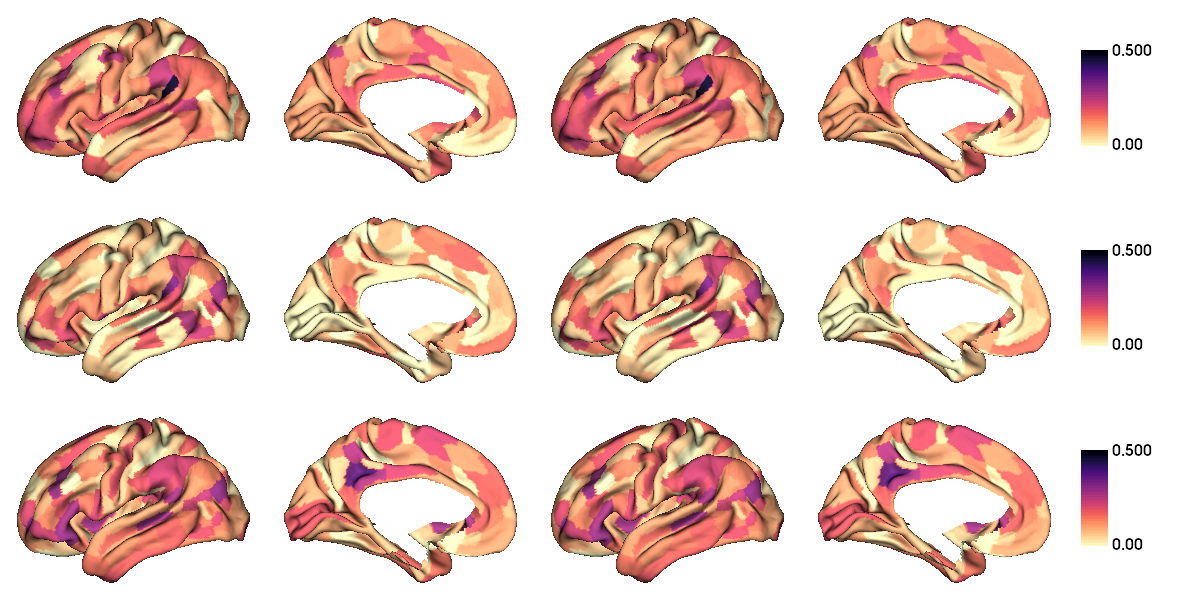

In [121]:
grad = [None] * 3
mask = fu.mmp_ll != 0
if pattern == 'intra':
  for i in range(3):
    a = np.concatenate((heri_hcp[i][:,0], heri_hcp[i][:,0]))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0

else:
  for i in range(3):
    a = np.concatenate((heri_hcp[i+3][:,0], heri_hcp[i+3][:,0]))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0

fu.plot_surface_ll(data=grad, size=(1200,600), cmap='magma_r', color_range=(0, 0.5), 
                   filename='../figures/heritability_hcp_'+pattern+'.png')

### ASD VS Controls

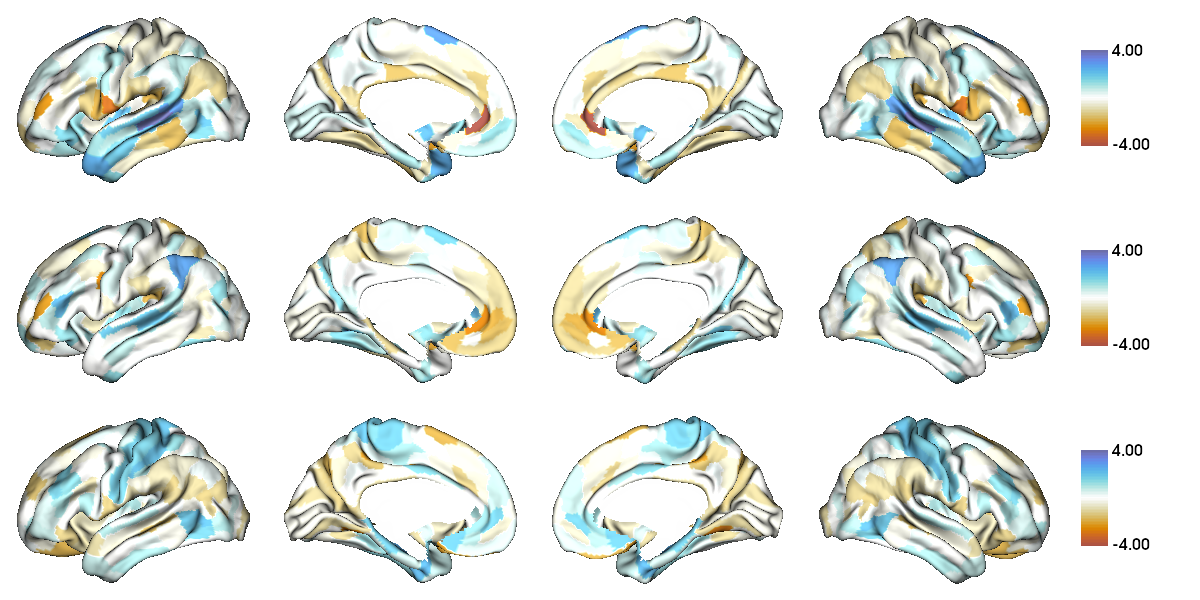

In [122]:
grad = [None] * 3
t = [None] * 3
mask = fu.mmp_lr != 0
for i in range(3):
  l = group[:,i].copy()
  #l[l>0] = l[l>0] * 2
  r = group[:,i].copy()
  #r[r<0] = r[r<0] * 2
  a = np.concatenate((l, r))
  t[i] = a
  a[a==0]=-1
  grad[i] = map_to_labels(a, fu.mmp_lr, mask=mask)
  grad[i][grad[i]==0]=np.nan
  grad[i][grad[i]==-1]=0

fu.plot_surface_lr(data=grad, size=(1200,600), cmap=cmr.prinsenvlag, color_range=(-4, 4), 
                   filename='../figures/decode_groupdiff_t_'+pattern+'.png')

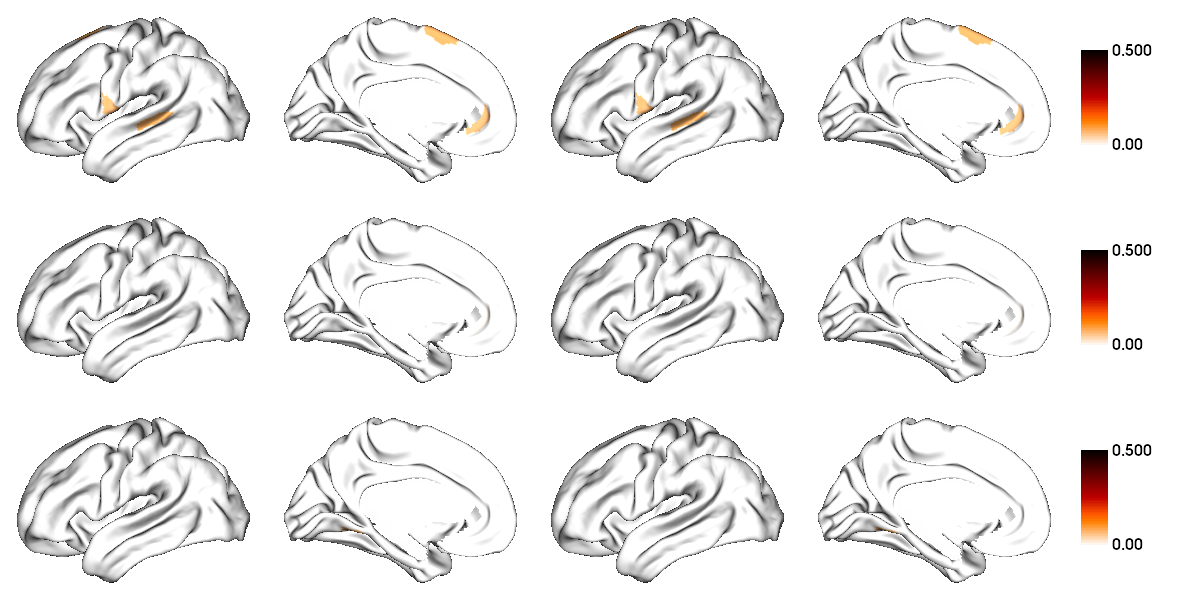

In [123]:
grad = [None] * 3
mask = fu.mmp_ll != 0
if pattern == 'intra':
  for i in range(3):
    b = heri_hcp[i][:,0].copy()
    b[group[:,i+4] == 1] = -1
    a = np.concatenate((b, b))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0
else:
  for i in range(3):
    b = heri_hcp[i][:,0].copy()
    b[group[:,i+4] == 1] = -1
    a = np.concatenate((b, b))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0

fu.plot_surface_ll(data=grad, size=(1200,600), cmap='gist_heat_r', color_range=(0, 0.5), 
                   filename='../figures/heritability_hcp_group_'+pattern+'.png')

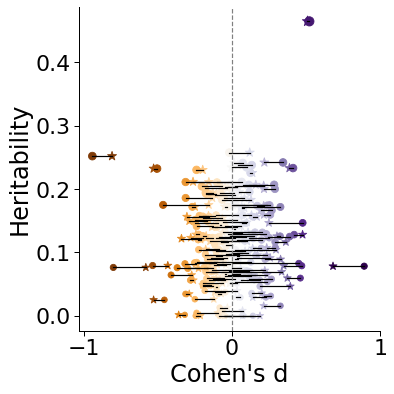

In [124]:
asd = np.loadtxt('../results/asd_stat_intra_cohen_pfdr.csv')[:,:3]
con = np.loadtxt('../results/con_stat_intra_cohen_pfdr.csv')[:,:3]
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(1, figsize=(6,6))
ax.scatter(asd[:,0], heri_hcp[0][:,0], s=heri_hcp[0][:,0]*120+60, vmin=-0.6, vmax=0.6,
           cmap='PuOr', c=asd[:,0], marker='*', label='ASD')
ax.scatter(con[:,0], heri_hcp[0][:,0], s=heri_hcp[0][:,0]*120+30, vmin=-0.6, vmax=0.6,
           cmap='PuOr', c=con[:,0], marker='o', label='CON')
for i in range(180):
  ax.plot([asd[:,0][i], con[:,0][i]],[heri_hcp[0][:,0][i],heri_hcp[0][:,0][i]], c='black')           
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(x=0, color='gray', ls='--')
ax.set_xticks([-1,0,1])
ax.set_xlabel("Cohen's d")
ax.set_ylabel('Heritability')
#ax.legend(loc='center right', fontsize=14)
fig.tight_layout()
fig.savefig('../figures/h2_asd_con_intra.png', dpi=300, transparent=True)

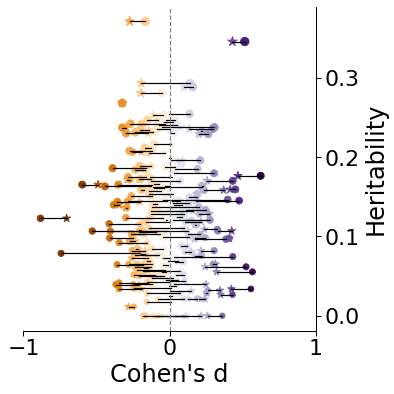

In [125]:
asd = np.loadtxt('../results/asd_stat_inter_cohen_pfdr.csv')[:,:3]
con = np.loadtxt('../results/con_stat_inter_cohen_pfdr.csv')[:,:3]
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(1, figsize=(6,6))
ax.yaxis.tick_right()
ax.scatter(asd[:,0], heri_hcp[3][:,0], s=heri_hcp[3][:,0]*120+60, vmin=-0.6, vmax=0.6,
           cmap='PuOr', c=asd[:,0], marker='*', label='ASD')
ax.scatter(con[:,0], heri_hcp[3][:,0], s=heri_hcp[3][:,0]*120+30, vmin=-0.6, vmax=0.6,
           cmap='PuOr', c=con[:,0], marker='o', label='CON')
for i in range(180):
  ax.plot([asd[:,0][i], con[:,0][i]],[heri_hcp[3][:,0][i],heri_hcp[3][:,0][i]], c='black')           
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(x=0, color='gray', ls='--')
ax.set_xticks([-1,0,1])
ax.set_xlabel("Cohen's d")
ax.set_ylabel('Heritability')
ax.yaxis.set_label_position("right")
#ax.legend(loc='center right', fontsize=14)
fig.tight_layout()
fig.savefig('../figures/h2_asd_con_inter.png', dpi=300, transparent=True)

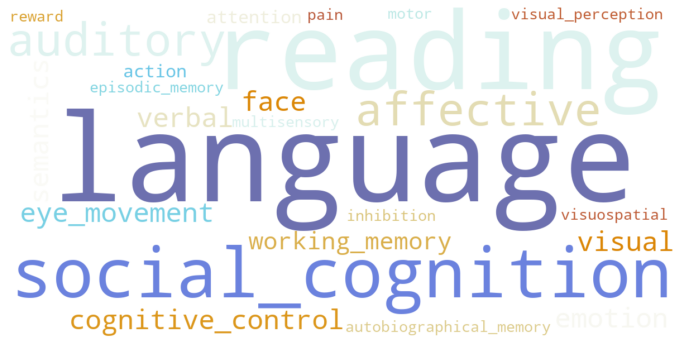

In [126]:
# decode
rank = ss.rankdata(t[g-1])
mask = fu.mmp_lr != 0
for i in range(20):
  rank[np.logical_and(rank>i*18, rank<=(i+1)*18)] = i+1
t_64k = map_to_labels(rank, fu.mmp_lr, mask=mask)
func_bin = np.zeros((24, 20))
for i in range(24):
  for j in range(20):
    func_bin[i][j] = fu.func_vertex[i][t_64k==j+1].mean()

t_bin = np.array([t[g-1][rank==i+1].mean() for i in range(20)])

tmp_z = ss.zscore(func_bin, axis=1)
tmp=tmp_z.copy()
tmp[tmp<0] = np.nan
weight = tmp * t_bin
term_rank = np.nanmean(weight, axis=1)

text = ''
for i in range(24):
  text += (fu.terms[i]+' ') * int(term_rank[i]+2)

wc = WordCloud(background_color="white", repeat=False, colormap=cmr.prinsenvlag_r, random_state=29,
               width=1200, height=600)
wc.generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('../figures/decode_group_'+pattern+'_g'+str(g)+'.png', dpi=300)

In [127]:
group_intra.shape

(180, 8)

In [128]:
df = [None] * 3
sig = [None] * 3
for i in range(3):
  if pattern=='intra':
    sig[i] = np.where(group_intra[:,i+4] != 1)[0]
    tmp = [sig[i], group_intra[:,i][sig[i]], fu.mmp_labels[sig[i]], heri_hcp_se[i][sig[i]], 
           heri_hcp[i][:,0][sig[i]], fu.fdr(heri_hcp[i][:,1])[sig[i]]]
  else:
    sig[i] = np.where(group_inter[:,i+4] != 1)[0]
    tmp = [sig[i], group_inter[:,i][sig[i]], fu.mmp_labels[sig[i]], heri_hcp_se[i+3][sig[i]], 
           heri_hcp[i+3][:,0][sig[i]], fu.fdr(heri_hcp[i+3][:,1])[sig[i]]]
  df[i] = pd.DataFrame()         
  df[i]['ID']=tmp[0]+1
  df[i]['G'] = [i+1] * len(sig[i])
  df[i]['label']=tmp[2]
  df[i]['t']=tmp[1]
  df[i]['h2'] = tmp[4]
  se_sig = tmp[3].copy()
  se_sig = np.nan_to_num(se_sig)
  df[i]['h2_se'] = se_sig
  df[i]['h2_pfdr'] = tmp[5]
df = pd.concat(df).reset_index(drop=True)
df.to_csv('../results/h2_t_group_'+pattern+'.csv', index=None)
df

,ID,G,label,t,h2,h2_se,h2_pfdr
0,26,1,SFL,2.757965,0.078280,0.062388,0.139214
1,61,1,a24,-4.287723,0.069412,0.060497,0.160959
2,99,1,43,-3.057910,0.071573,0.055073,0.138654
3,129,1,STSdp,3.795619,0.082648,0.058758,0.120345
4,61,2,a24,-2.712079,0.011155,0.062849,0.532872
5,153,3,VMV1,-2.834068,0.074577,0.000000,0.121443


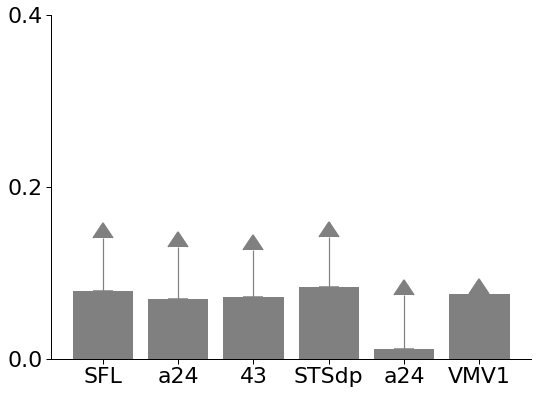

In [129]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(1, figsize=(len(df.index)+2,6))
ax.bar(df.index, df['h2'],yerr=df['h2_se'], color='grey', width=0.8,
       error_kw=dict(ecolor='grey', capsize=10, capthick=1.5, lolims=True))
ax.set_xticks(df.index)
ax.set_xticklabels(df['label'])
ax.set_ylim(0,0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([0,0.2,0.4])
plt.tight_layout()
plt.savefig('../figures/h2_se_group_'+pattern+'.png', dpi=300, transparent=True)

### Age*group

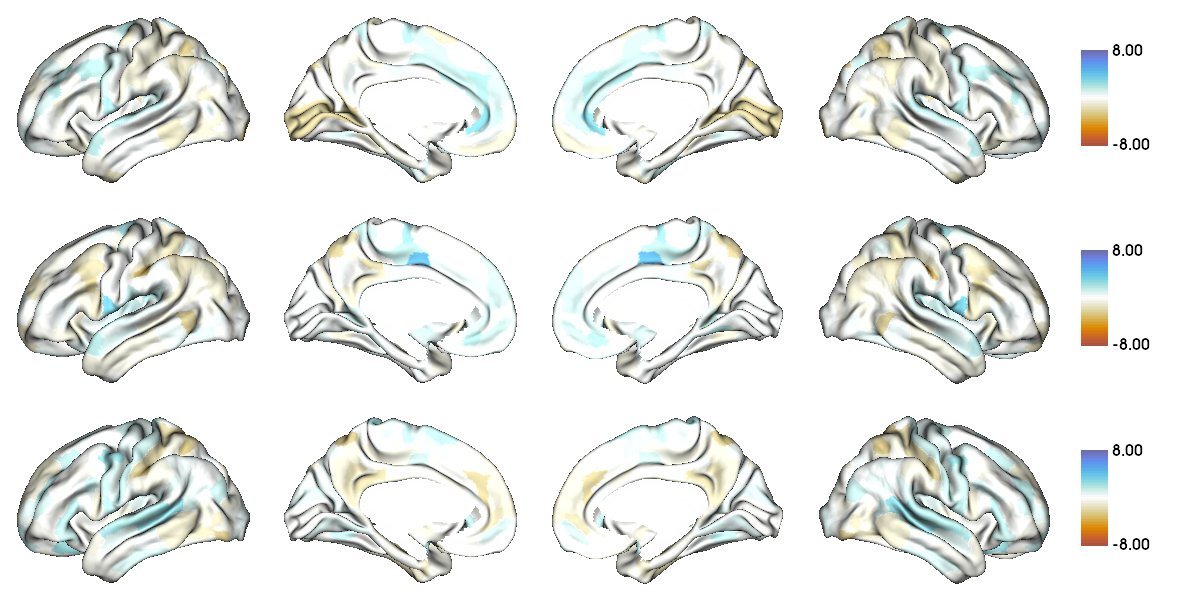

In [130]:
grad = [None] * 3
t = [None] * 3
mask = fu.mmp_lr != 0
for i in range(3):
  l = interact[:,i].copy()
  #l[l>0] = l[l>0] * 2
  r = interact[:,i].copy()
  #r[r<0] = r[r<0] * 2
  a = np.concatenate((l, r))
  t[i] = a
  a[a==0]=-1
  grad[i] = map_to_labels(a, fu.mmp_lr, mask=mask)
  grad[i][grad[i]==0]=np.nan
  grad[i][grad[i]==-1]=0

fu.plot_surface_lr(data=grad, size=(1200,600), cmap=cmr.prinsenvlag, color_range=(-8, 8), 
                   filename='../figures/decode_interaction_t_'+pattern+'.png')

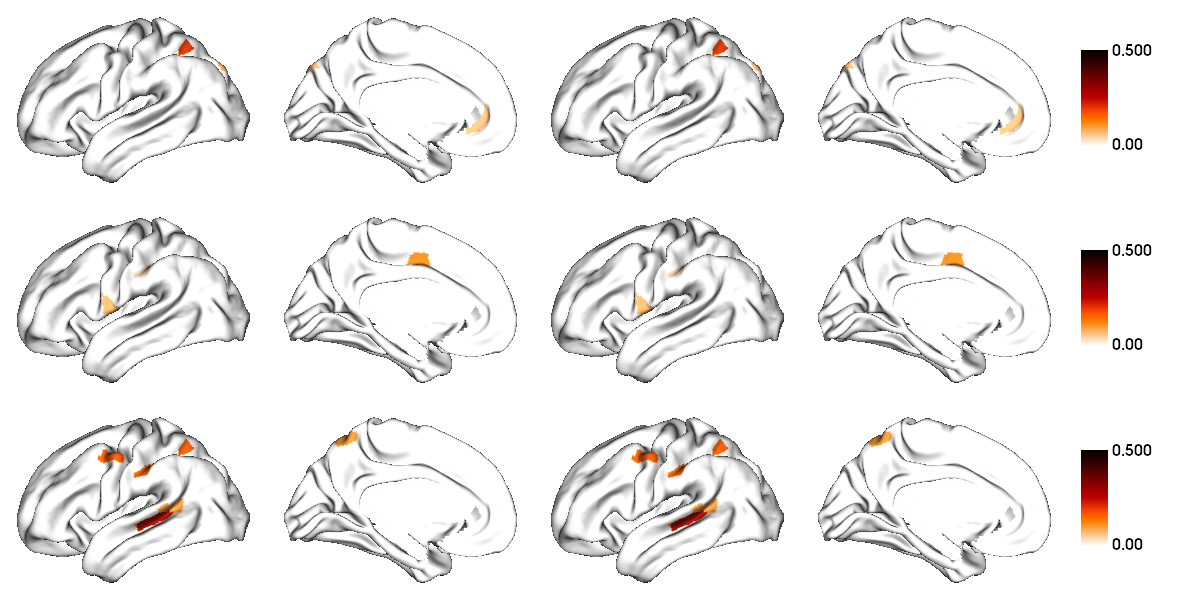

In [131]:
grad = [None] * 3
mask = fu.mmp_ll != 0
if pattern == 'intra':
  for i in range(3):
    b = heri_hcp[i][:,0].copy()
    b[interact[:,i+4] == 1] = -1
    a = np.concatenate((b, b))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0
else:
  for i in range(3):
    b = heri_hcp[i][:,0].copy()
    b[interact[:,i+4] == 1] = -1
    a = np.concatenate((b, b))
    a[a==0]=-1
    grad[i] = map_to_labels(a, fu.mmp_ll, mask=mask)
    grad[i][grad[i]==0]=np.nan
    grad[i][grad[i]==-1]=0

fu.plot_surface_ll(data=grad, size=(1200,600), cmap='gist_heat_r', color_range=(0, 0.5), 
                   filename='../figures/heritability_hcp_interact_'+pattern+'.png')

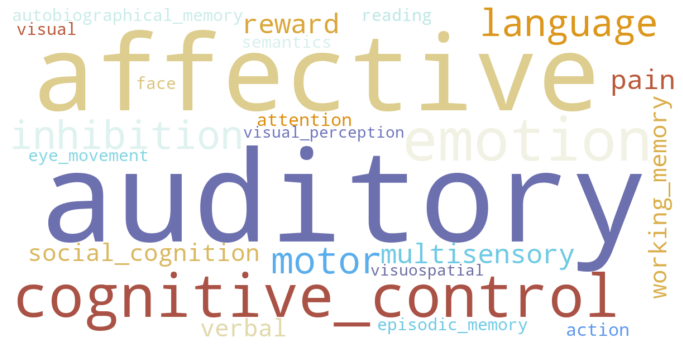

In [132]:
# decode
rank = ss.rankdata(t[g-1])
mask = fu.mmp_lr != 0
for i in range(20):
  rank[np.logical_and(rank>i*18, rank<=(i+1)*18)] = i+1
t_64k = map_to_labels(rank, fu.mmp_lr, mask=mask)
func_bin = np.zeros((24, 20))
for i in range(24):
  for j in range(20):
    func_bin[i][j] = fu.func_vertex[i][t_64k==j+1].mean()

t_bin = np.array([t[g-1][rank==i+1].mean() for i in range(20)])

tmp_z = ss.zscore(func_bin, axis=1)
tmp=tmp_z.copy()
tmp[tmp<0] = np.nan
weight = tmp * t_bin
term_rank = np.nanmean(weight, axis=1)

text = ''
for i in range(24):
  text += (fu.terms[i]+' ') * int(term_rank[i]+2)

wc = WordCloud(background_color="white", repeat=False, colormap=cmr.prinsenvlag_r, random_state=29,
               width=1200, height=600)
wc.generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('../figures/decode_interact_'+pattern+'_g'+str(g)+'.png', dpi=300)

In [133]:
df = [None] * 3
sig = [None] * 3
for i in range(3):
  if pattern=='intra':
    sig[i] = np.where(interact_intra[:,i+4] != 1)[0]
    tmp = [sig[i], interact_intra[:,i][sig[i]], fu.mmp_labels[sig[i]], heri_hcp_se[i][sig[i]], 
           heri_hcp[i][:,0][sig[i]], fu.fdr(heri_hcp[i][:,1])[sig[i]]]
  else:
    sig[i] = np.where(interact_inter[:,i+4] != 1)[0]
    tmp = [sig[i], interact_inter[:,i][sig[i]], fu.mmp_labels[sig[i]], heri_hcp_se[i+3][sig[i]], 
           heri_hcp[i+3][:,0][sig[i]], fu.fdr(heri_hcp[i+3][:,1])[sig[i]]]
  df[i] = pd.DataFrame()         
  df[i]['ID']=tmp[0]+1
  df[i]['G'] = [i+1] * len(sig[i])
  df[i]['label']=tmp[2]
  df[i]['t']=tmp[1]
  df[i]['h2'] = tmp[4]
  se_sig = tmp[3].copy()
  se_sig = np.nan_to_num(se_sig)
  df[i]['h2_se'] = se_sig
  df[i]['h2_pfdr'] = tmp[5]
df = pd.concat(df).reset_index(drop=True)
df.to_csv('../results/h2_t_interact_'+pattern+'.csv', index=None)
df

,ID,G,label,t,h2,h2_se,h2_pfdr
0,48,1,LIPv,-2.476060,0.203447,0.058676,0.002424
1,61,1,a24,2.863587,0.069412,0.060497,0.160959
2,152,1,V6A,-2.483694,0.083491,0.061992,0.131472
3,41,2,24dv,4.282243,0.117155,0.058600,0.069353
4,99,2,43,3.315656,0.076234,0.060548,0.206469
5,116,2,PFt,-3.320356,0.032356,0.059083,0.421359
6,12,3,55b,2.431009,0.164456,0.059353,0.008504
7,45,3,7Am,-2.462853,0.103091,0.058536,0.070021
8,48,3,LIPv,-2.571601,0.164152,0.058106,0.007153
9,116,3,PFt,-2.759114,0.148606,0.059638,0.016747
